# Question 1

## (a)

Given $f(x) = x^4 + 2x^2 + 1$, find the derivative of $f(x)$ with
$$\frac{df}{dx} = 4x^3 + 4x$$
By the first order necessary condition, find all x values such that $f'(x) = 0$
$$ \Rightarrow 4x^3 + 4x = 0 \Rightarrow 4x(x^2 + 1) = 0 \Rightarrow x^* = 0$$
Check the second order sufficient condition in which $f''(x^*) > 0$
$$\frac{d^2f}{dx^2} = 12x^2 + 4 \Rightarrow 12(0) + 4 > 0$$
Since $x^* = 0$ satisfies both condition, then the minimum is obtained at $x = 0$

## (b)

### Constant Step Size

Importing packages and functions

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def f(x):
    return x**4 + 2*x**2 + 1

def grad_f(x):
    return 4*x**3 + 4*x


Note that f(x) is a convex function, the step size chosen can be found where $\eta \in (0, \frac{1}{L})$ where L is the lipshitz constant. This constant can be found by $L > f''(x_0)$ where $x_0$ is the initial starting point. For this problem, set $x_0 = 2.5$ and stopping condition when $\nabla f(x) < \epsilon$, in which $\epsilon = 10^{-6}$. This implies that step size is
$$ L > f''(2.5) = 34 \Rightarrow \eta \in (0, \frac{1}{34})$$ For this problem, let $\eta = \frac{1}{40}$:


In [68]:
def gd_constant(x, eta, error):
    val = []
    val.append(f(x))
    while abs(grad_f(x)) > error:
        grad = grad_f(x)
        x = x - (eta * grad)
        val.append(f(x))
    return x, val

x = 2.5
eta = 1/40
error = 1e-6
min, obj_values = gd_constant(x, eta, error)
print("The minimum is achieved at x =", min)

The minimum is achieved at x = 2.3896495439217063e-07


Plot of objective function throughout iterations

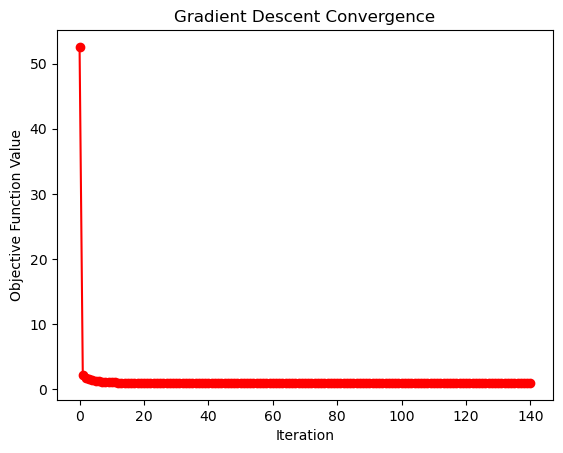

In [69]:
plt.plot(obj_values, marker='o', linestyle='-', color='red')
plt.xlabel("Iteration")
plt.ylabel("Objective Function Value")
plt.title("Gradient Descent Convergence")
plt.show()


### Back-tracking Line Search

In [70]:
def h(eta, x):
    return f(x - eta*grad_f(x))

def h_prime(x):
    return -grad_f(x) * grad_f(x)

def armijo(eta, epsilon, tau, x):
    while h(eta, x) > h(0, x) + (epsilon * h_prime(x)):
        eta = tau * eta
    return eta

def gd_backtrack(x, eta, error, epsilon, tau):
    val = []
    val.append(f(x))
    while abs(grad_f(x)) > error:
        grad = grad_f(x)
        eta = armijo(eta, epsilon, tau, x)
        x = x - (eta * grad)
        val.append(f(x))
    return x, val


    

min, obj_values = gd_backtrack(1.3, 1, 1e-6, 0.01, 0.8)

print("The minimum is achieved at x =", min)

The minimum is achieved at x = 1.389673115986773e-07


Plot of objective function through iterations

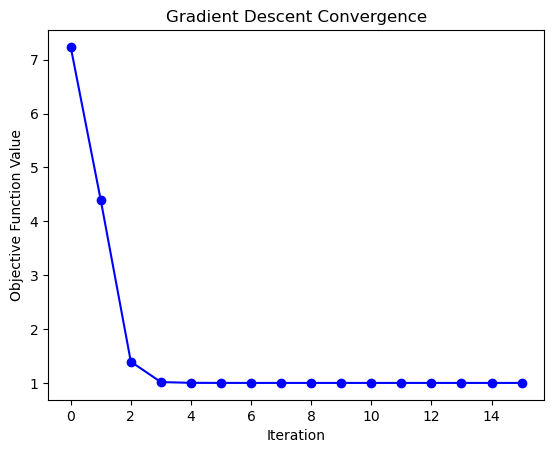

In [71]:
plt.plot(obj_values, marker='o', linestyle='-', color='blue')
plt.xlabel("Iteration")
plt.ylabel("Objective Function Value")
plt.title("Gradient Descent Convergence")
plt.show()


Plot of step size $\eta_k$ at $k = 0$, or at initial $x_0 = 1.3$

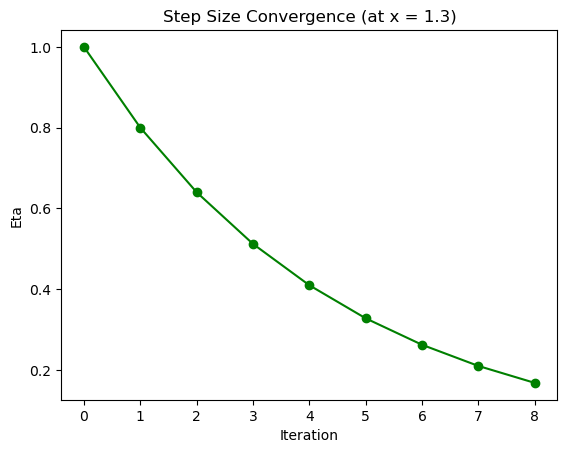

In [72]:
def armijo_plot(eta, epsilon, tau, x):
    val = []
    val.append(eta)
    while h(eta, x) > h(0, x) + (epsilon * h_prime(x)):
        eta = tau * eta
        val.append(eta)
    plt.plot(val, marker='o', linestyle='-', color='green')
    plt.xlabel("Iteration")
    plt.ylabel("Eta")
    plt.title("Step Size Convergence (at x = 1.3)")
    plt.show()

armijo_plot(1, 0.01, 0.8, 1.3)

# Question 2

In [73]:
d1 = pd.read_csv("dataset1.csv")
d2 = pd.read_csv("dataset2.csv")

## (a)

In [74]:
def gradient_descent(X, y, eta, tol, epsilon, tau, max_iter=1000, backtracking=True):
    n, p = X.shape
    beta = np.zeros(p)
    obj_values = []
    
    def obj_function(beta):
        return np.sum((X @ beta - y) ** 2) / (2 * n)
    
    def gradient(beta):
        return X.T @ (X @ beta - y) / n
    
    for _ in range(max_iter):
        grad = gradient(beta)
        
        if backtracking:
            t = 1  # Initial step size
            beta_new = beta - t * grad
            
            while obj_function(beta_new) > obj_function(beta) - epsilon * t * np.sum(grad ** 2):
                t *= tau
                beta_new = beta - t * grad
        else:
            beta_new = beta - eta * grad
        
        obj_values.append(obj_function(beta_new))
        
        if np.linalg.norm(beta_new - beta) < tol:
            break
        
        beta = beta_new
    
    return beta, obj_values


In [75]:
d1_X = d1.iloc[:, 1:]
d1_y = d1["Y"]
d2_X = d2.iloc[:, 1:]
d2_y = d2["Y"]

### Constant Step Size

Because this function is a quadratic function, the step size can be found by $\eta \in (0, \frac{2}{\lambda_{max}(Q)})$ where $Q = \frac{1}{n}(X^TX)$

In [76]:
#Eigenvalue for d1
eigenval, _ = np.linalg.eig(1/100 * (d1_X.T @ d1_X) )
eta1 = 2 / max(eigenval)

#Eigenvalue for d2
eigenval, _ = np.linalg.eig(1/100 * (d2_X.T @ d2_X) )
eta2 = 2 / max(eigenval)

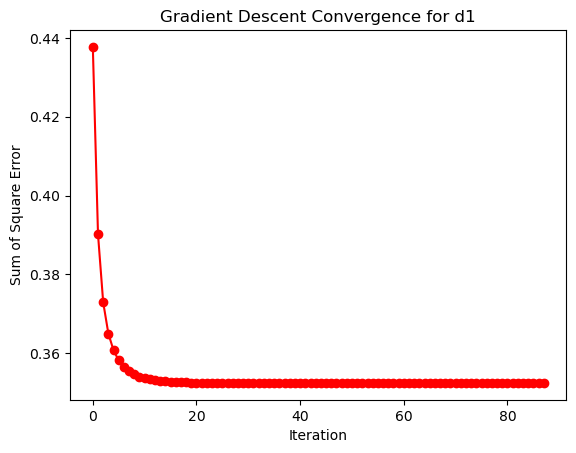

In [77]:
beta_d1_fixed, obj_values = gradient_descent(d1_X, d1_y, eta1 * 0.8, 1e-6, 0.01, 0.8, backtracking = False)

plt.plot(obj_values, marker='o', linestyle='-', color='red')
plt.xlabel("Iteration")
plt.ylabel("Sum of Square Error")
plt.title("Gradient Descent Convergence for d1")
plt.show()

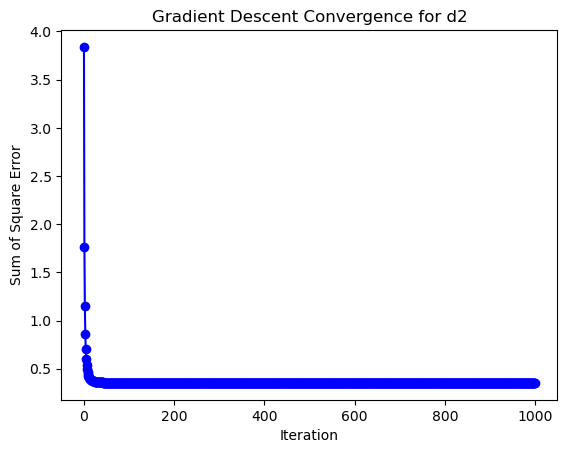

In [78]:
beta_d2_fixed, obj_values = gradient_descent(d2_X, d2_y, eta2 * 0.8, 1e-6, 0.01, 0.8, backtracking = False)

plt.plot(obj_values, marker='o', linestyle='-', color='blue')
plt.xlabel("Iteration")
plt.ylabel("Sum of Square Error")
plt.title("Gradient Descent Convergence for d2")
plt.show()

### Backtracking Line Search

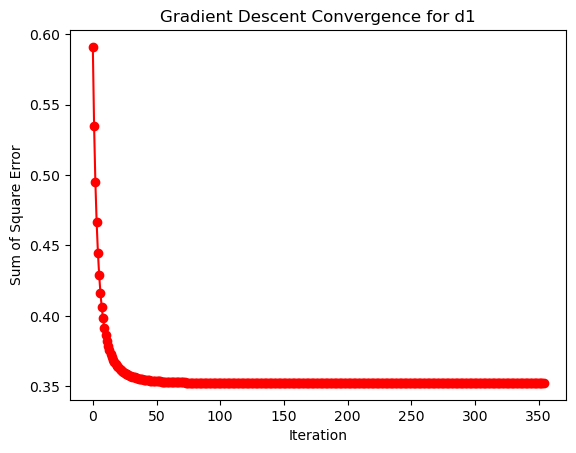

In [79]:
beta_d1_track, obj_values = gradient_descent(d1_X, d1_y, 1.2, 1e-6, 0.01, 0.8, backtracking = True)

plt.plot(obj_values, marker='o', linestyle='-', color='red')
plt.xlabel("Iteration")
plt.ylabel("Sum of Square Error")
plt.title("Gradient Descent Convergence for d1")
plt.show()

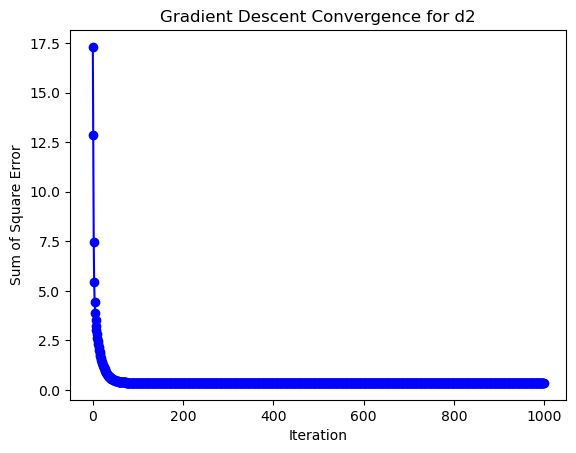

In [80]:
beta_d2_track, obj_values = gradient_descent(d2_X, d2_y, 0.01, 1e-6, 0.001, 0.8, backtracking = True)

plt.plot(obj_values, marker='o', linestyle='-', color='blue')
plt.xlabel("Iteration")
plt.ylabel("Sum of Square Error")
plt.title("Gradient Descent Convergence for d2")
plt.show()

### Compare with Prebuilt Packages

In [81]:
from sklearn.linear_model import LinearRegression

In [82]:
#Fit the linear regression model
linreg = LinearRegression(fit_intercept=False)

#Fit d1
linreg.fit(d1_X, d1_y)
beta_hat_d1 = linreg.coef_

#Fit d2
linreg.fit(d2_X, d2_y)
beta_hat_d2 = linreg.coef_

In [83]:
print("Difference in weight from d1 between fixed step size and lm:", np.linalg.norm(np.array(beta_d1_fixed) - beta_hat_d1))
print("Difference in weight from d2 between fixed step size and lm:", np.linalg.norm(np.array(beta_d2_fixed) - beta_hat_d2))
print("Difference in weight from d1 between backtracking and lm:", np.linalg.norm(np.array(beta_d1_track) - beta_hat_d1))
print("Difference in weight from d2 between backtracking and lm:", np.linalg.norm(np.array(beta_d2_track) - beta_hat_d2))

Difference in weight from d1 between fixed step size and lm: 7.404705702053477e-06
Difference in weight from d2 between fixed step size and lm: 0.18999889255760305
Difference in weight from d1 between backtracking and lm: 3.351423448106372e-05
Difference in weight from d2 between backtracking and lm: 0.1555181360914775


## (b)

In [84]:
def polyak(X, y, eta, tol, epsilon, tau, xi, max_iter=1000, backtracking=True):
    n, p = X.shape
    beta = np.zeros(p)
    obj_values = []
    
    def obj_function(beta):
        return np.sum((X @ beta - y) ** 2) / (2 * n)
    
    def gradient(beta):
        return X.T @ (X @ beta - y) / n

    momentum = beta - (1 if backtracking else eta) * gradient(beta)
    
    for i in range(1, max_iter):
        grad = gradient(momentum)
        if backtracking:
            t = 1  # Initial step size
            
            beta_new = momentum + xi*(momentum - beta) - t * grad
            
            while obj_function(beta_new) > obj_function(momentum) - epsilon * t * np.sum(grad ** 2):
                t *= tau
                beta_new = momentum + xi*(momentum - beta) - t * grad
        else:
            beta_new = momentum + xi*(momentum - beta) - eta * grad
        
        obj_values.append(obj_function(beta_new))
        
        if np.linalg.norm(beta_new - momentum) < tol:
            break

        beta = momentum
        momentum = beta_new
        
    
    return beta, obj_values

In [85]:
def nesterov(X, y, eta, tol, epsilon, tau, xi, max_iter=1000, backtracking=True):
    n, p = X.shape
    beta_first = np.zeros(p)
    obj_values = []

    def obj_function(beta):
        return np.sum((X @ beta - y) ** 2) / (2 * n)

    def gradient(beta):
        return X.T @ (X @ beta - y) / n

    beta_second = beta_first - (1 if backtracking else eta) * gradient(beta_first)

    for i in range(1, max_iter):
        lookahead = beta_second + xi * (beta_second - beta_first)
        grad = gradient(lookahead)
        t = eta

        if backtracking:
            #t = 1
            beta_new = lookahead - t * grad

            while obj_function(beta_new) > obj_function(lookahead) - epsilon * t * np.sum(grad ** 2):
                t *= tau
                beta_new = lookahead - t * grad
 

        else:
            beta_new = lookahead - eta * grad

        obj_values.append(obj_function(beta_new))

        if np.linalg.norm(beta_new - beta_second) < tol:
            break

        beta_first = beta_second #b_k-1 = b_k
        beta_second = beta_new #b_k = b_k+1

    return beta_new, obj_values


### Polyak Constant

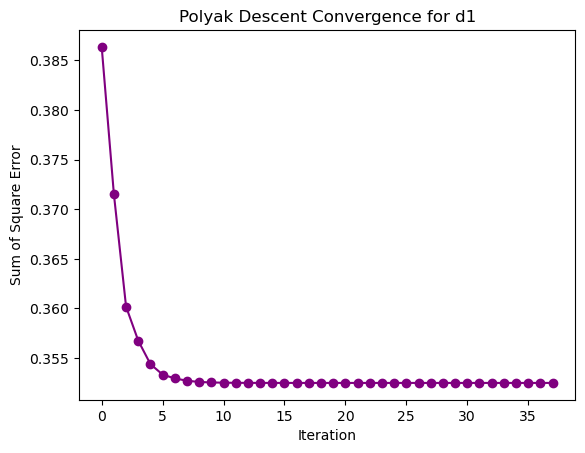

In [86]:
polyak_d1_fixed, obj_values = polyak(d1_X, d1_y, eta1 * 0.8, 1e-6, 0.01, 0.8, 0.4, backtracking = False)

plt.plot(obj_values, marker='o', linestyle='-', color='purple')
plt.xlabel("Iteration")
plt.ylabel("Sum of Square Error")
plt.title("Polyak Descent Convergence for d1")
plt.show()

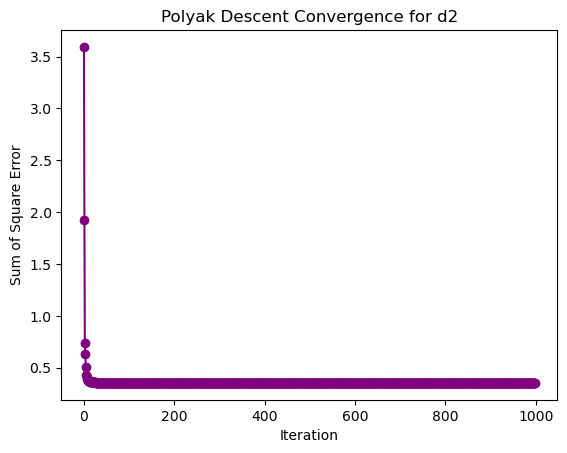

In [87]:
polyak_d2_fixed, obj_values = polyak(d2_X, d2_y, eta2 * 0.8, 1e-6, 0.01, 0.8, 0.4, backtracking = False)

plt.plot(obj_values, marker='o', linestyle='-', color='purple')
plt.xlabel("Iteration")
plt.ylabel("Sum of Square Error")
plt.title("Polyak Descent Convergence for d2")
plt.show()

### Polyak Backtracking

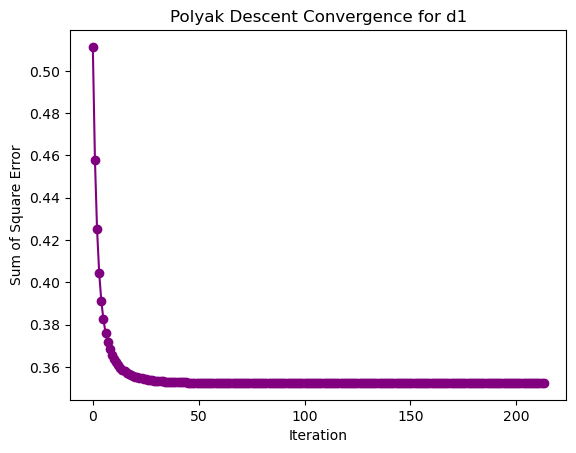

In [88]:
polyak_d1_track, obj_values = polyak(d1_X, d1_y, eta1 * 0.8, 1e-6, 1e-6, 0.8, 0.4, backtracking = True)

plt.plot(obj_values, marker='o', linestyle='-', color='purple')
plt.xlabel("Iteration")
plt.ylabel("Sum of Square Error")
plt.title("Polyak Descent Convergence for d1")
plt.show()

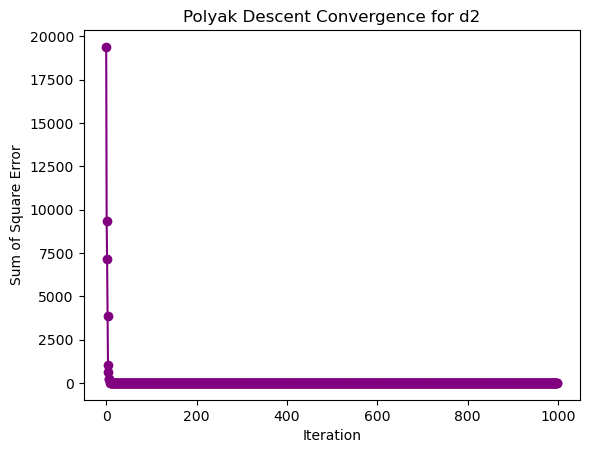

In [89]:
polyak_d2_track, obj_values = polyak(d2_X, d2_y, eta2 * 0.8, 1e-6, 1e-6, 0.8, 0.4, backtracking = True)

plt.plot(obj_values, marker='o', linestyle='-', color='purple')
plt.xlabel("Iteration")
plt.ylabel("Sum of Square Error")
plt.title("Polyak Descent Convergence for d2")
plt.show()

### Comparing Values

In [90]:
print("Difference in weight from d1 between fixed step size and lm:", np.linalg.norm(np.array(polyak_d1_fixed) - beta_hat_d1))
print("Difference in weight from d2 between fixed step size and lm:", np.linalg.norm(np.array(polyak_d2_fixed) - beta_hat_d2))
print("Difference in weight from d1 between backtracking and lm:", np.linalg.norm(np.array(polyak_d1_track) - beta_hat_d1))
print("Difference in weight from d2 between backtracking and lm:", np.linalg.norm(np.array(polyak_d2_track) - beta_hat_d2))

Difference in weight from d1 between fixed step size and lm: 4.583538896225466e-06
Difference in weight from d2 between fixed step size and lm: 0.11159041653782996
Difference in weight from d1 between backtracking and lm: 2.0284577106802963e-05
Difference in weight from d2 between backtracking and lm: 0.03754777514803515


## Nesterov Constant

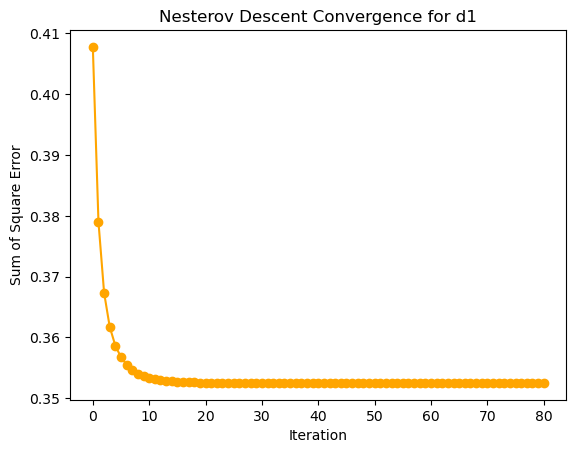

In [91]:
nesterov_d1_fixed, obj_values = nesterov(d1_X, d1_y, eta1 * 0.5, 1e-6, 0.01, 0.8, 0.4, backtracking = False)

plt.plot(obj_values, marker='o', linestyle='-', color='orange')
plt.xlabel("Iteration")
plt.ylabel("Sum of Square Error")
plt.title("Nesterov Descent Convergence for d1")
plt.show()

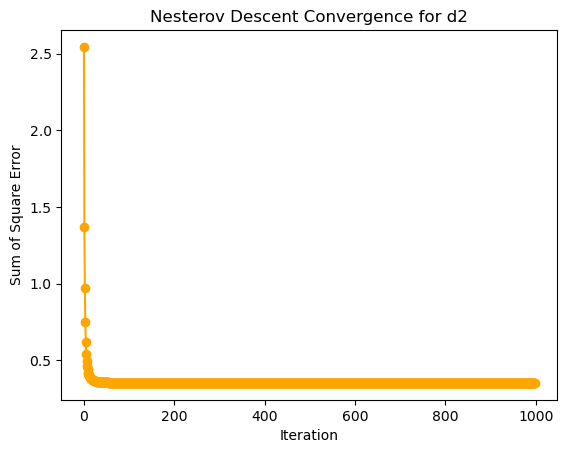

In [92]:
nesterov_d2_fixed, obj_values = nesterov(d2_X, d2_y, eta2 * 0.5, 1e-6, 0.01, 0.8, 0.4, backtracking = False)

plt.plot(obj_values, marker='o', linestyle='-', color='orange')
plt.xlabel("Iteration")
plt.ylabel("Sum of Square Error")
plt.title("Nesterov Descent Convergence for d2")
plt.show()

### Nesterov Backtracking

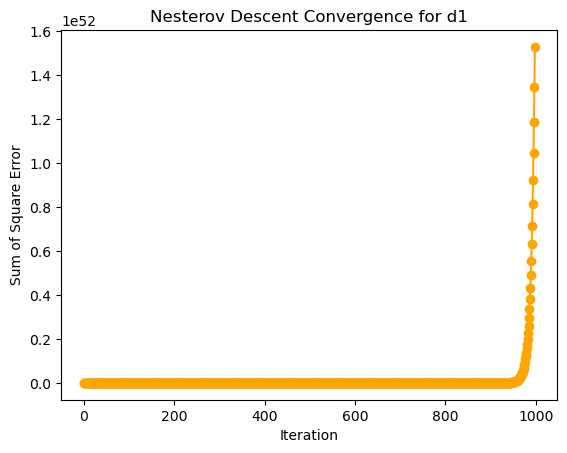

In [93]:
nesterov_d1_track, obj_values = nesterov(d1_X, d1_y, eta1 * 0.8, 1e-6, 0.01, 0.8, 0.4, backtracking = True)

plt.plot(obj_values, marker='o', linestyle='-', color='orange')
plt.xlabel("Iteration")
plt.ylabel("Sum of Square Error")
plt.title("Nesterov Descent Convergence for d1")
plt.show()

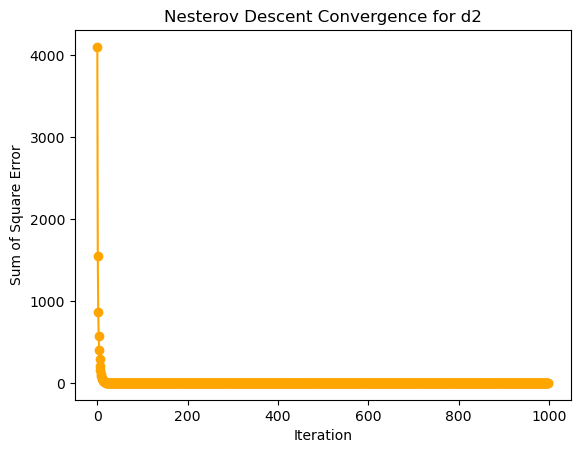

In [94]:
nesterov_d2_track, obj_values = nesterov(d2_X, d2_y, eta2 * 0.8, 1e-6, 0.01, 0.8, 0.2, backtracking = True)

plt.plot(obj_values, marker='o', linestyle='-', color='orange')
plt.xlabel("Iteration")
plt.ylabel("Sum of Square Error")
plt.title("Nesterov Descent Convergence for d2")
plt.show()

### Comparing Values

In [95]:
print("Difference in weight from d1 between fixed step size and lm:", np.linalg.norm(np.array(nesterov_d1_fixed) - beta_hat_d1))
print("Difference in weight from d2 between fixed step size and lm:", np.linalg.norm(np.array(nesterov_d2_fixed) - beta_hat_d2))
print("Difference in weight from d1 between backtracking and lm:", np.linalg.norm(np.array(nesterov_d1_track) - beta_hat_d1))
print("Difference in weight from d2 between backtracking and lm:", np.linalg.norm(np.array(nesterov_d2_track) - beta_hat_d2))

Difference in weight from d1 between fixed step size and lm: 5.39214142795583e-06
Difference in weight from d2 between fixed step size and lm: 0.18384094640122947
Difference in weight from d1 between backtracking and lm: 2.9017481407894093e+26
Difference in weight from d2 between backtracking and lm: 0.14897482975589849


### Conclusion

The momentum descent methods were shown to converge towards the minimum quicker than the standard descent methods. The accuracy of both models seem to be similar in both methods excepts for dataset2 when the step size was backtracked, as the momentum methods were shown to be more accurate. Overall, the momentum methods converge faster while maintaining similar accuracy, showing the efficient nature of using these methods.